## 라이브러리

### 기존

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'  

### 신규

In [28]:
# pip install missingno

In [29]:
# pip install fancyimpute

##### 신규 추가된 라이브러리

In [30]:
# 결측치 확인하는 라이브러리
import missingno as msno 

# 다중대체 라이브러리
from fancyimpute import IterativeImputer

# seaborn의 다른 라이브러리
import seaborn.objects as so

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [31]:
bike_nan = pd.read_csv('C:/Users/정호원/OneDrive/바탕 화면/baf/3주차과제/SeoulBikeData_NaN.csv')

In [32]:
df = bike_nan.copy() # 원본 유지를 위한 복사
df.head()

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [33]:
df.tail()

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


##### EDA

In [34]:
df.describe()

,Unnamed: 0,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,7884.000000,8760.000000,7884.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4379.500000,704.602055,11.500000,13.026370,58.226256,1.727220,1436.825799,4.073813,0.569111,0.148687,0.075068
std,2528.938512,644.997468,6.922582,11.936017,20.362413,1.036138,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2189.750000,191.000000,5.750000,3.600000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,4379.500000,504.500000,11.500000,13.950000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,6569.250000,1065.250000,17.250000,22.600000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,8759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [35]:
df.info() # Temperature(°C) , Wind speed (m/s) , Seasons

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8760 non-null   int64  
 1   Date                       8760 non-null   object 
 2   Rented Bike Count          8760 non-null   int64  
 3   Hour                       8760 non-null   int64  
 4   Temperature(°C)            7884 non-null   float64
 5   Humidity(%)                8760 non-null   int64  
 6   Wind speed (m/s)           7884 non-null   float64
 7   Visibility (10m)           8760 non-null   int64  
 8   Dew point temperature(°C)  8760 non-null   float64
 9   Solar Radiation (MJ/m2)    8760 non-null   float64
 10  Rainfall(mm)               8760 non-null   float64
 11  Snowfall (cm)              8760 non-null   float64
 12  Seasons                    7884 non-null   object 
 13  Holiday                    8760 non-null   objec

###### Temperature(°C) Wind speed (m/s) Seasons 에서 결측이 발견됨

In [36]:
df.isna().sum() # 보다 직관적으로 확인할 수 있음

Unnamed: 0                     0
Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              876
Humidity(%)                    0
Wind speed (m/s)             876
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      876
Holiday                        0
Functioning Day                0
dtype: int64

<Axes: >

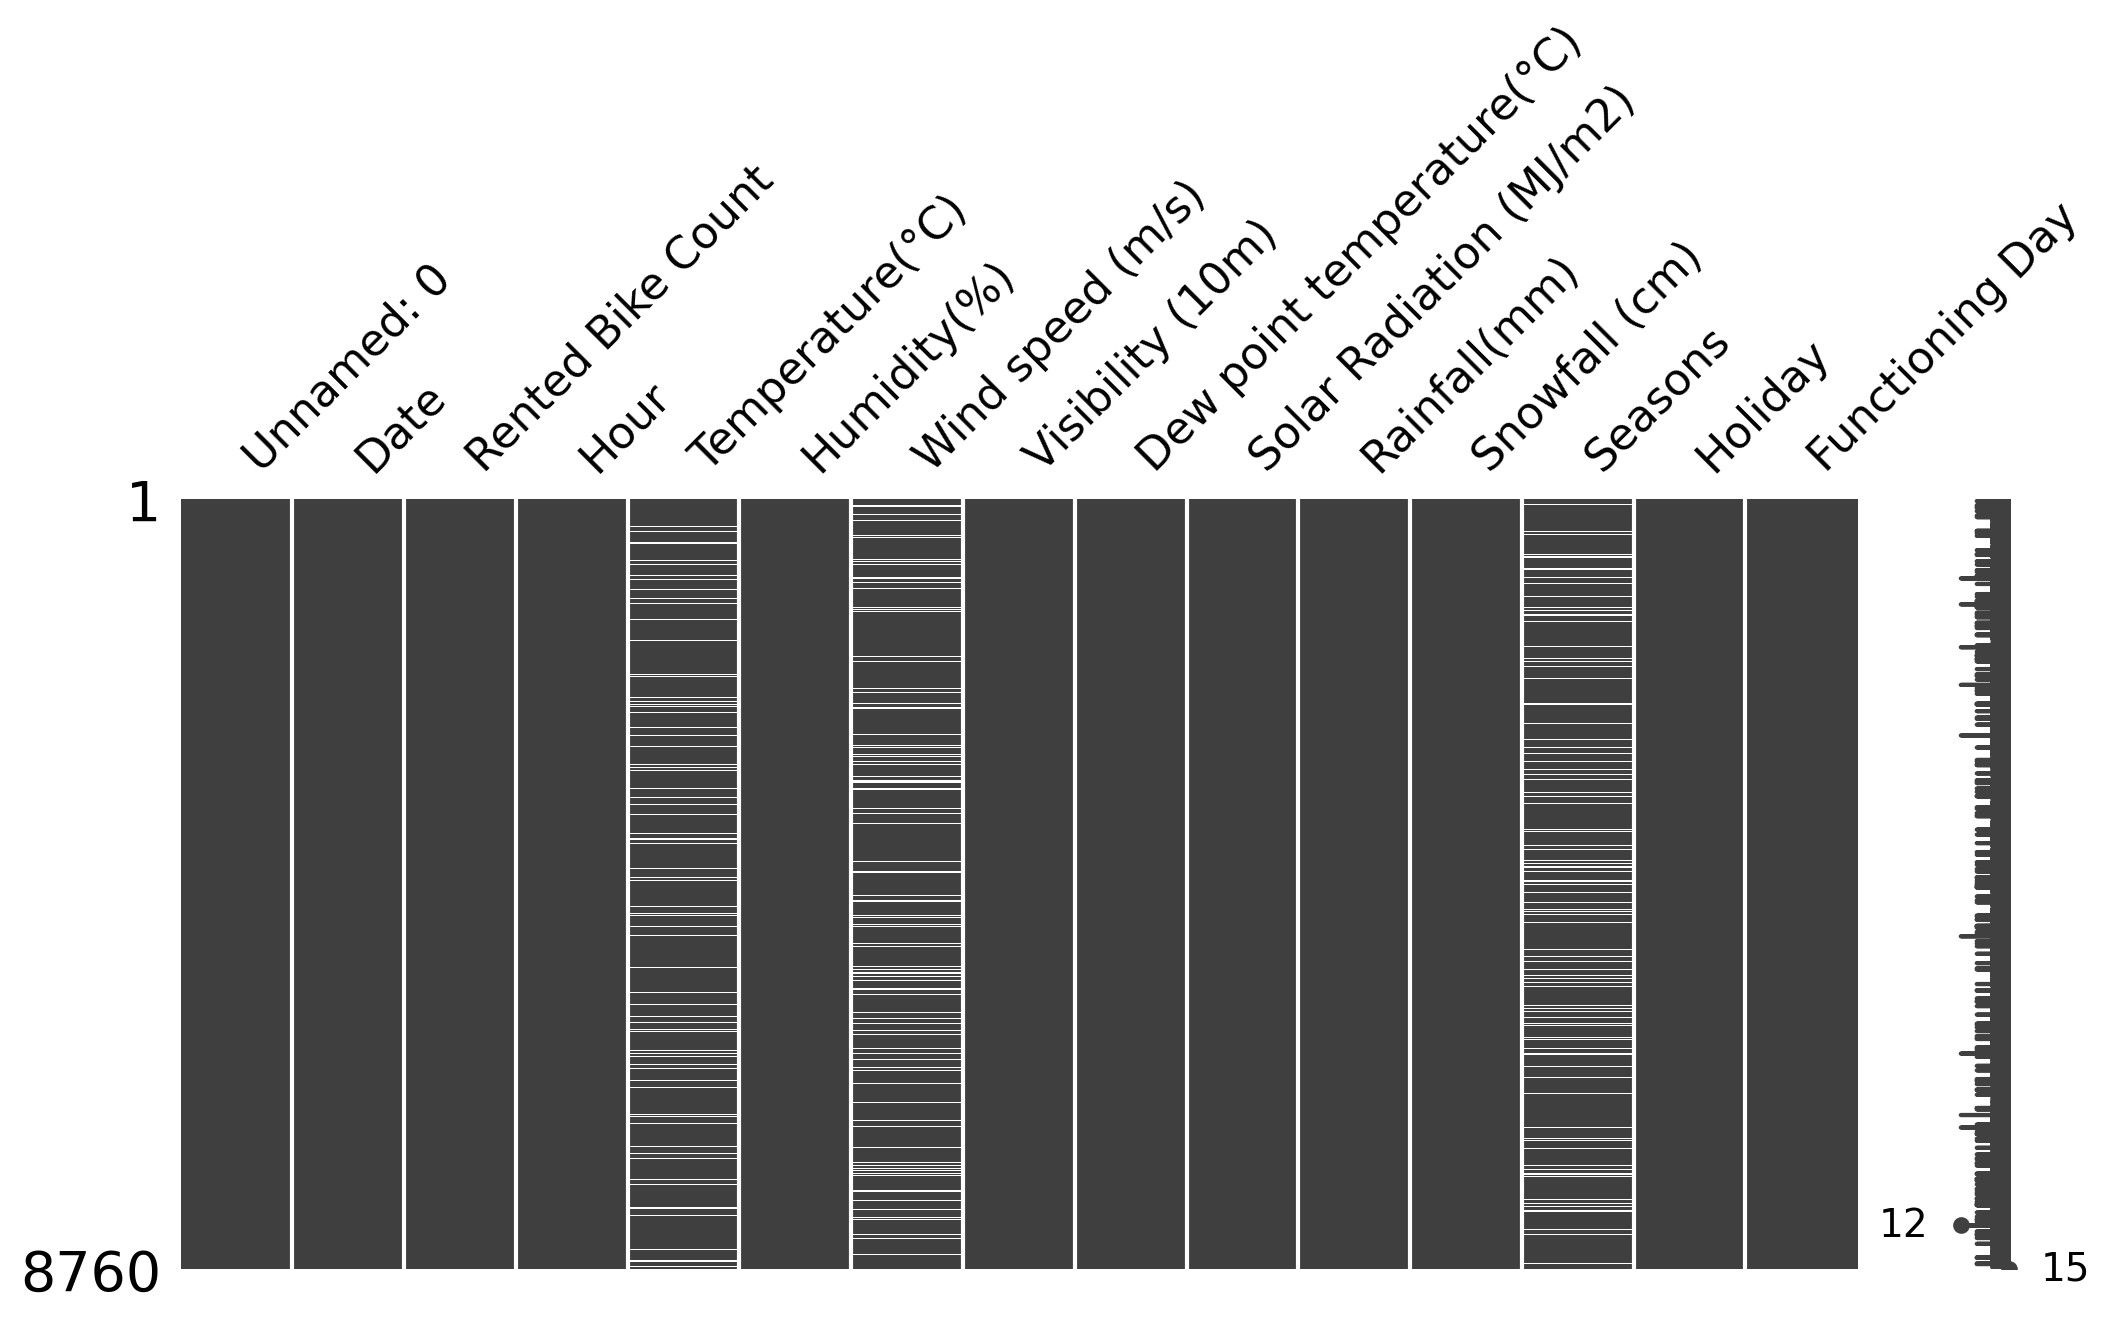

In [37]:
msno.matrix(df, figsize=(12,5))

#### 결측치 처리
###### 결측치의 개수가 876개로 동일하기 때문에 결측치를 처리하기 전, 결측이 발생한 행이 일치하는지의 여부를 확인하고자 함
###### Temperature(°C) , Wind speed (m/s) , Seasons

In [38]:
missing_rows = df[df[['Temperature(°C)', 'Wind speed (m/s)', 'Seasons']].isnull().all(axis=1)]
print(len(missing_rows))

if len(missing_rows) > 0:
    print("결측이 존재하는 세 개의 열 중에 모두 결측인 행이 있음")
    print(f"일치하는 행의 개수: {len(missing_rows)}")
else:
    print("결측이 존재하는 세 개의 열 중에 모두 결측인 행이 없음")

10
결측이 존재하는 세 개의 열 중에 모두 결측인 행이 있음
일치하는 행의 개수: 10


###### 결측이 모두 같은 행에는 발생하지 않는다는 것을 알 수 있음
###### 그렇기에 결측인 변수를 제거하는 방식보다는 대체하는 방식으로 결측을 대체하는 것이 맞다고 판단했음

##### 대체 이전에 결측이 발생한 각각의 열에 대해서 결측을 제외한 경향을 알고자 함

###### Temperature(°C)

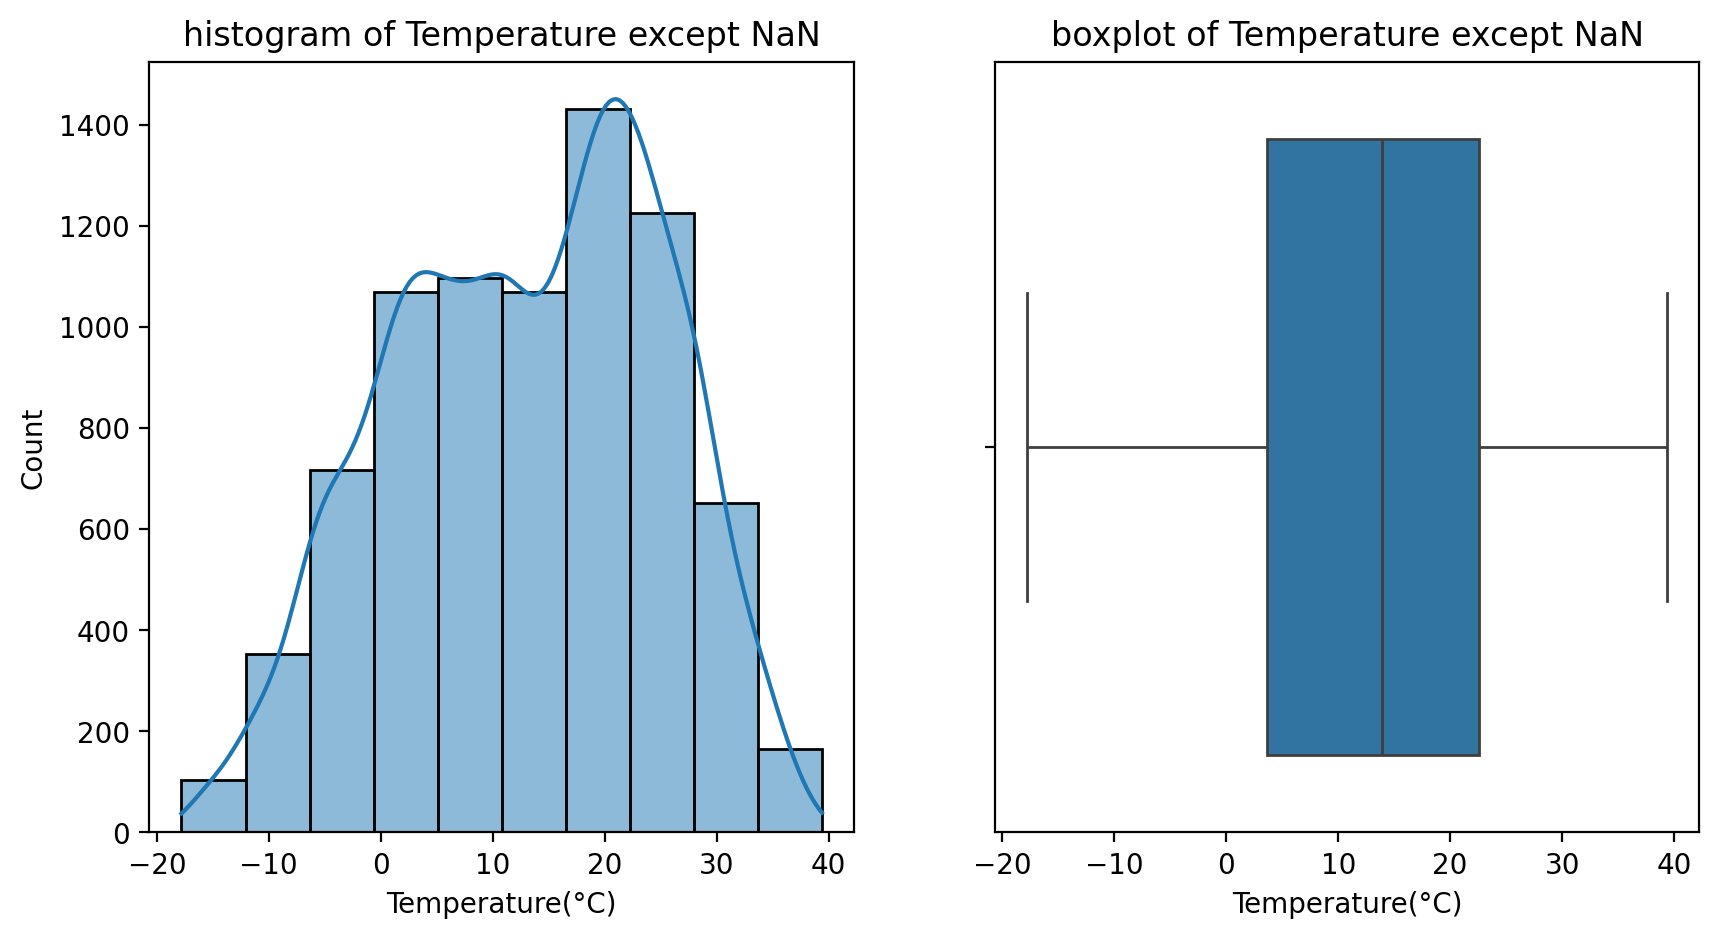

In [39]:
temp_T = df['Temperature(°C)'].dropna()

# 히스토그램
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(temp_T, bins=10, kde=True)
plt.title('histogram of Temperature except NaN')

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=temp_T)
plt.title('boxplot of Temperature except NaN')
plt.show()

###### Wind speed (m/s)

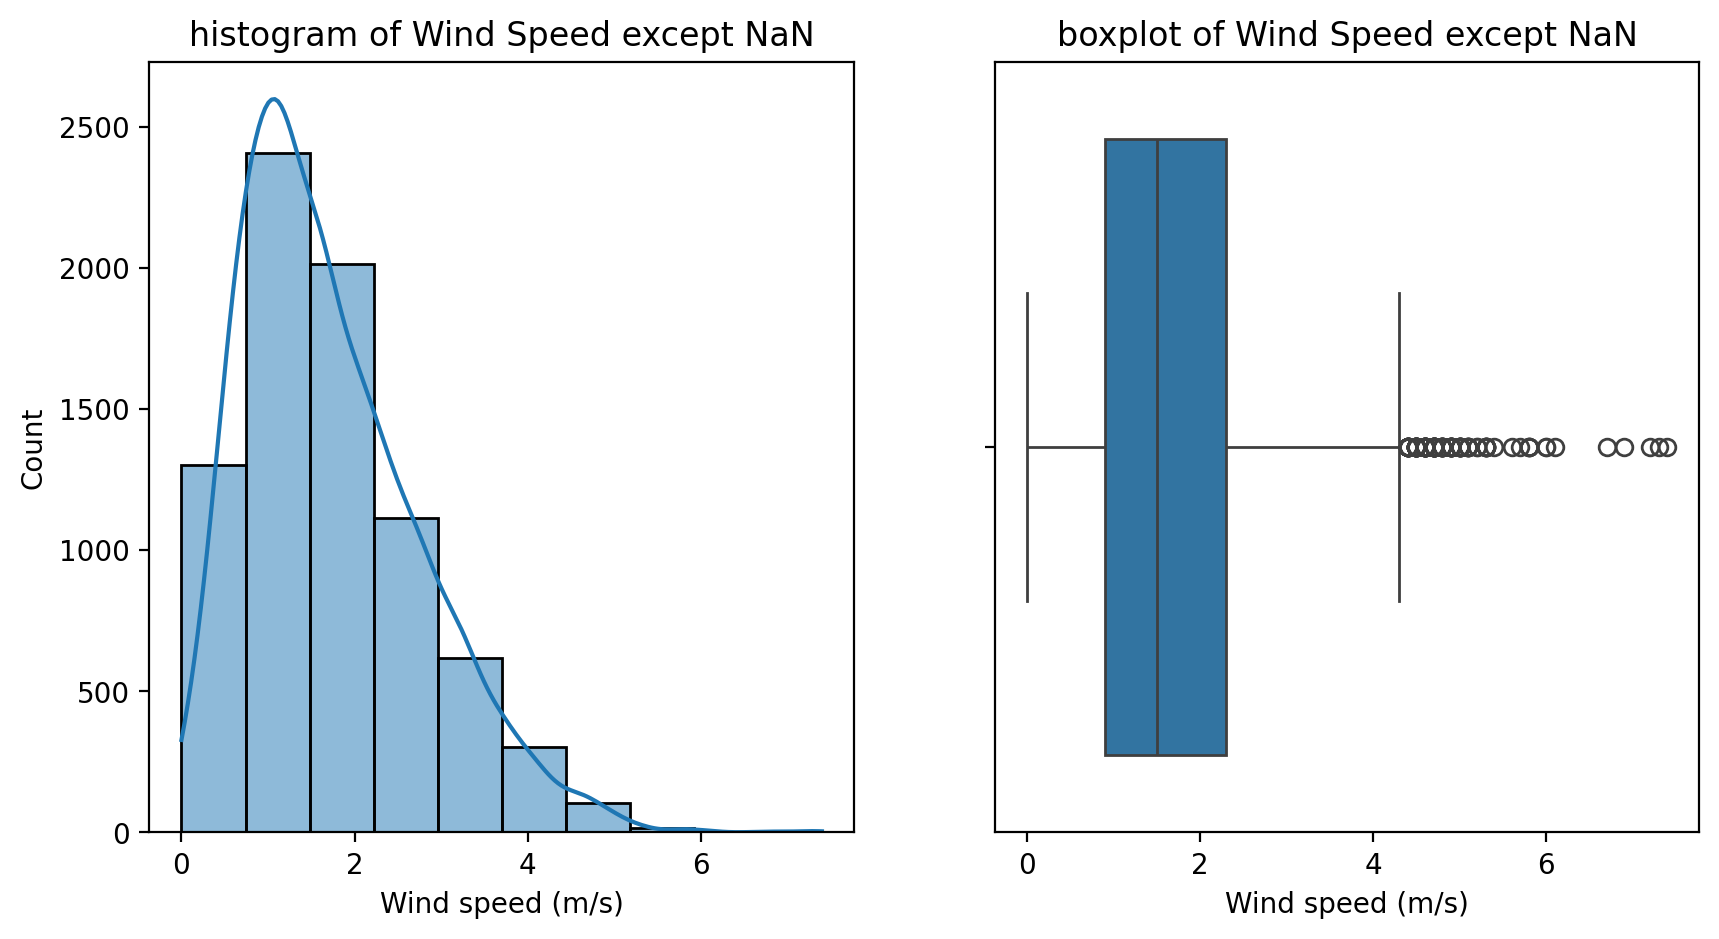

In [40]:
temp_W = df['Wind speed (m/s)'].dropna()

# 히스토그램
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(temp_W, bins=10, kde=True)
plt.title('histogram of Wind Speed except NaN')

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=temp_W)
plt.title('boxplot of Wind Speed except NaN')
plt.show()

###### Temperature와 Wind speed를 보았을 때 평균값이나 최빈값 혹은 median으로 nan값을 대체하기에는 
###### 계절에 따른 특성이 너무 확연하게 드러나기 때문에 값을 대체하려면 date에 따라서 Seasons 값들을 채워 넣고 그 이후에 계절에 따른 평균을 낸 후 그 값으로 대체하기로 계획

In [41]:
df_1 = df.copy()
df_1.head()

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [42]:
df_1['Date'] = pd.to_datetime(df_1['Date'], errors='coerce').dropna()

# 시작날짜와 끝날짜를 알기 위함
earliest_date = df_1['Date'].min()
latest_date = df_1['Date'].max()

print("시작날짜:", earliest_date)
print("끝날짜:", latest_date)


시작날짜: 2017-01-12 00:00:00
끝날짜: 2018-12-11 00:00:00


###### Seasons 변수 NaN 값부터 대체


In [43]:
import pandas as pd
from collections import Counter

df_2 = df.copy()

In [44]:
df_2.tail()

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


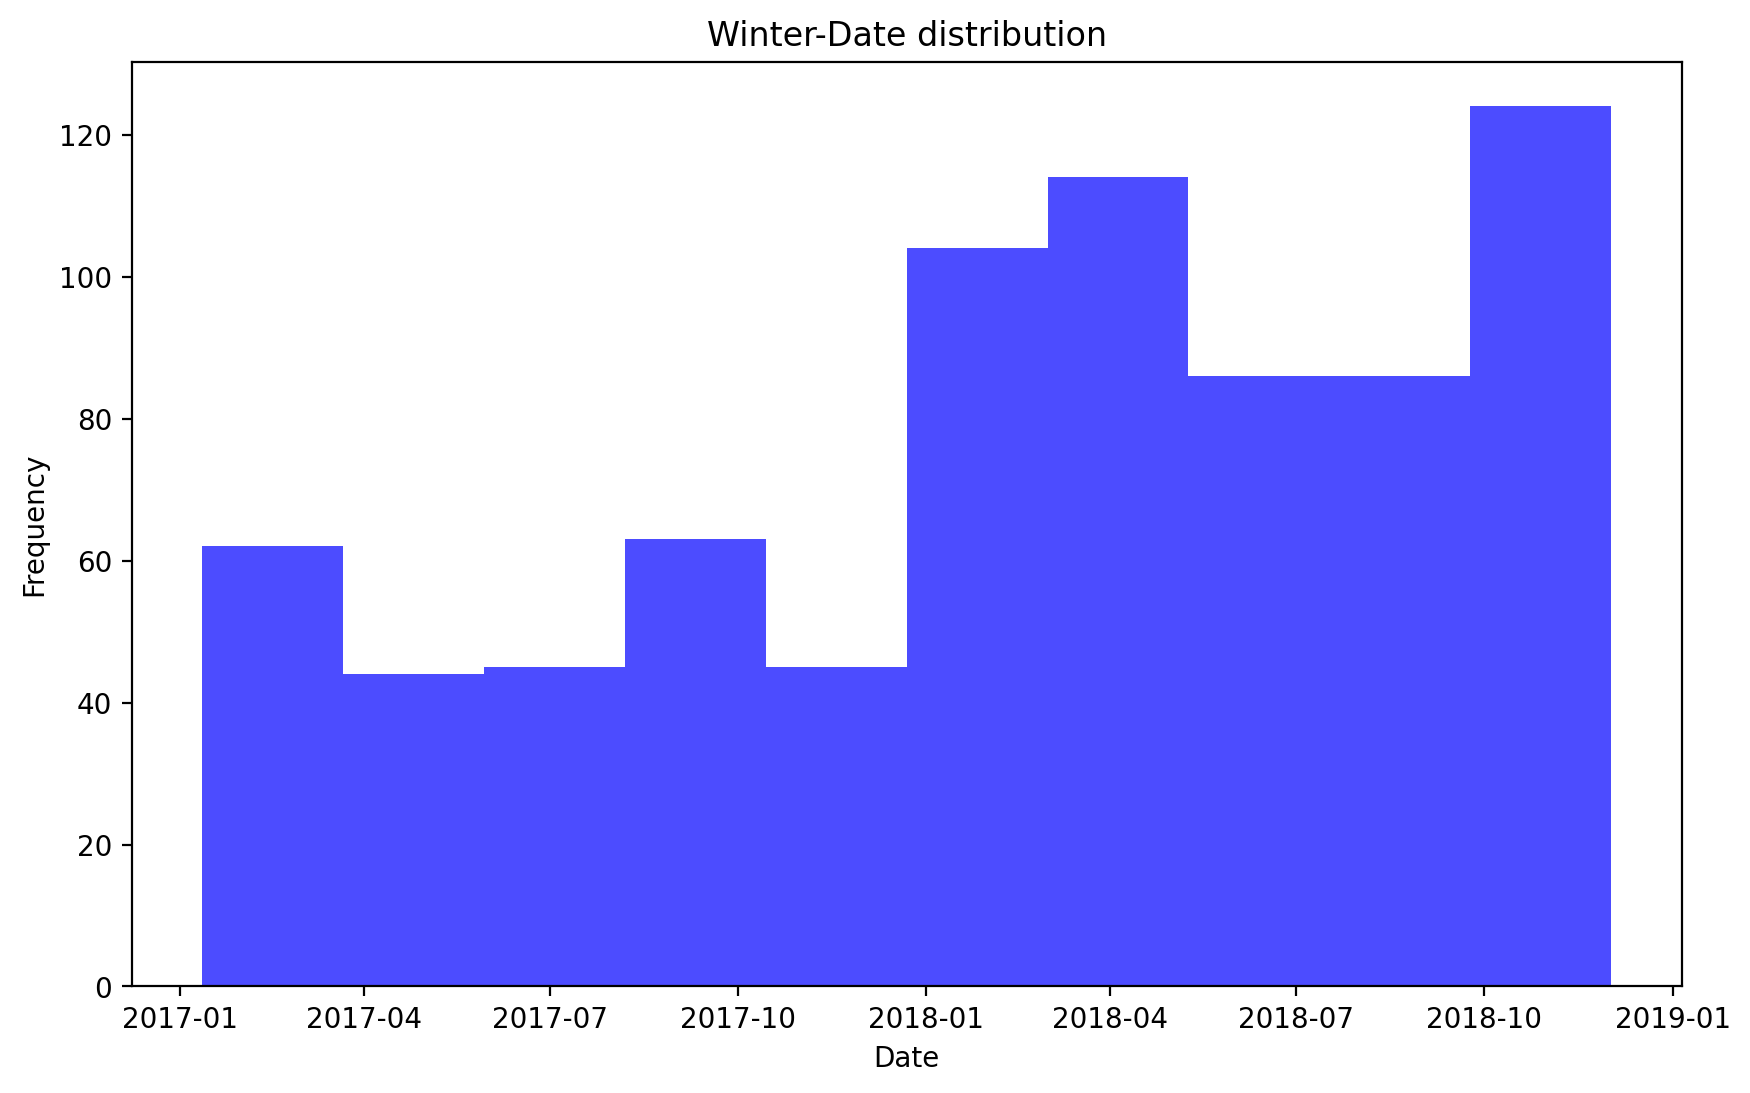

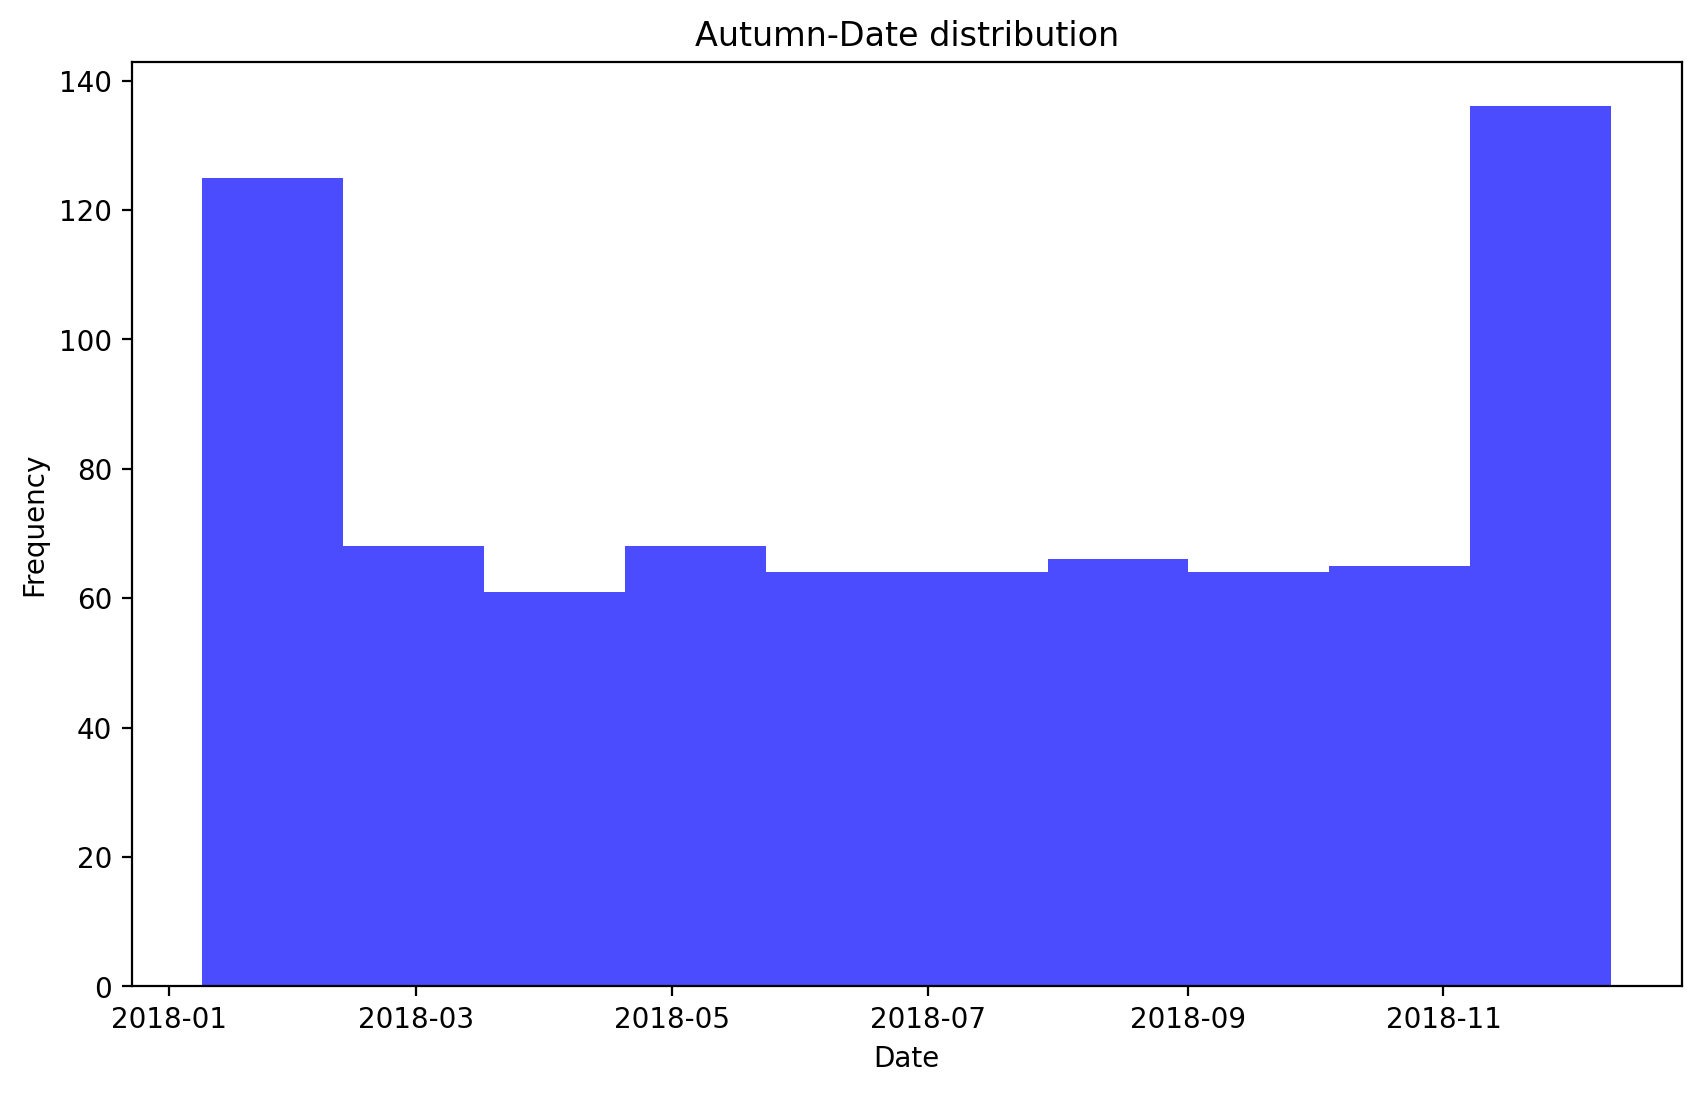

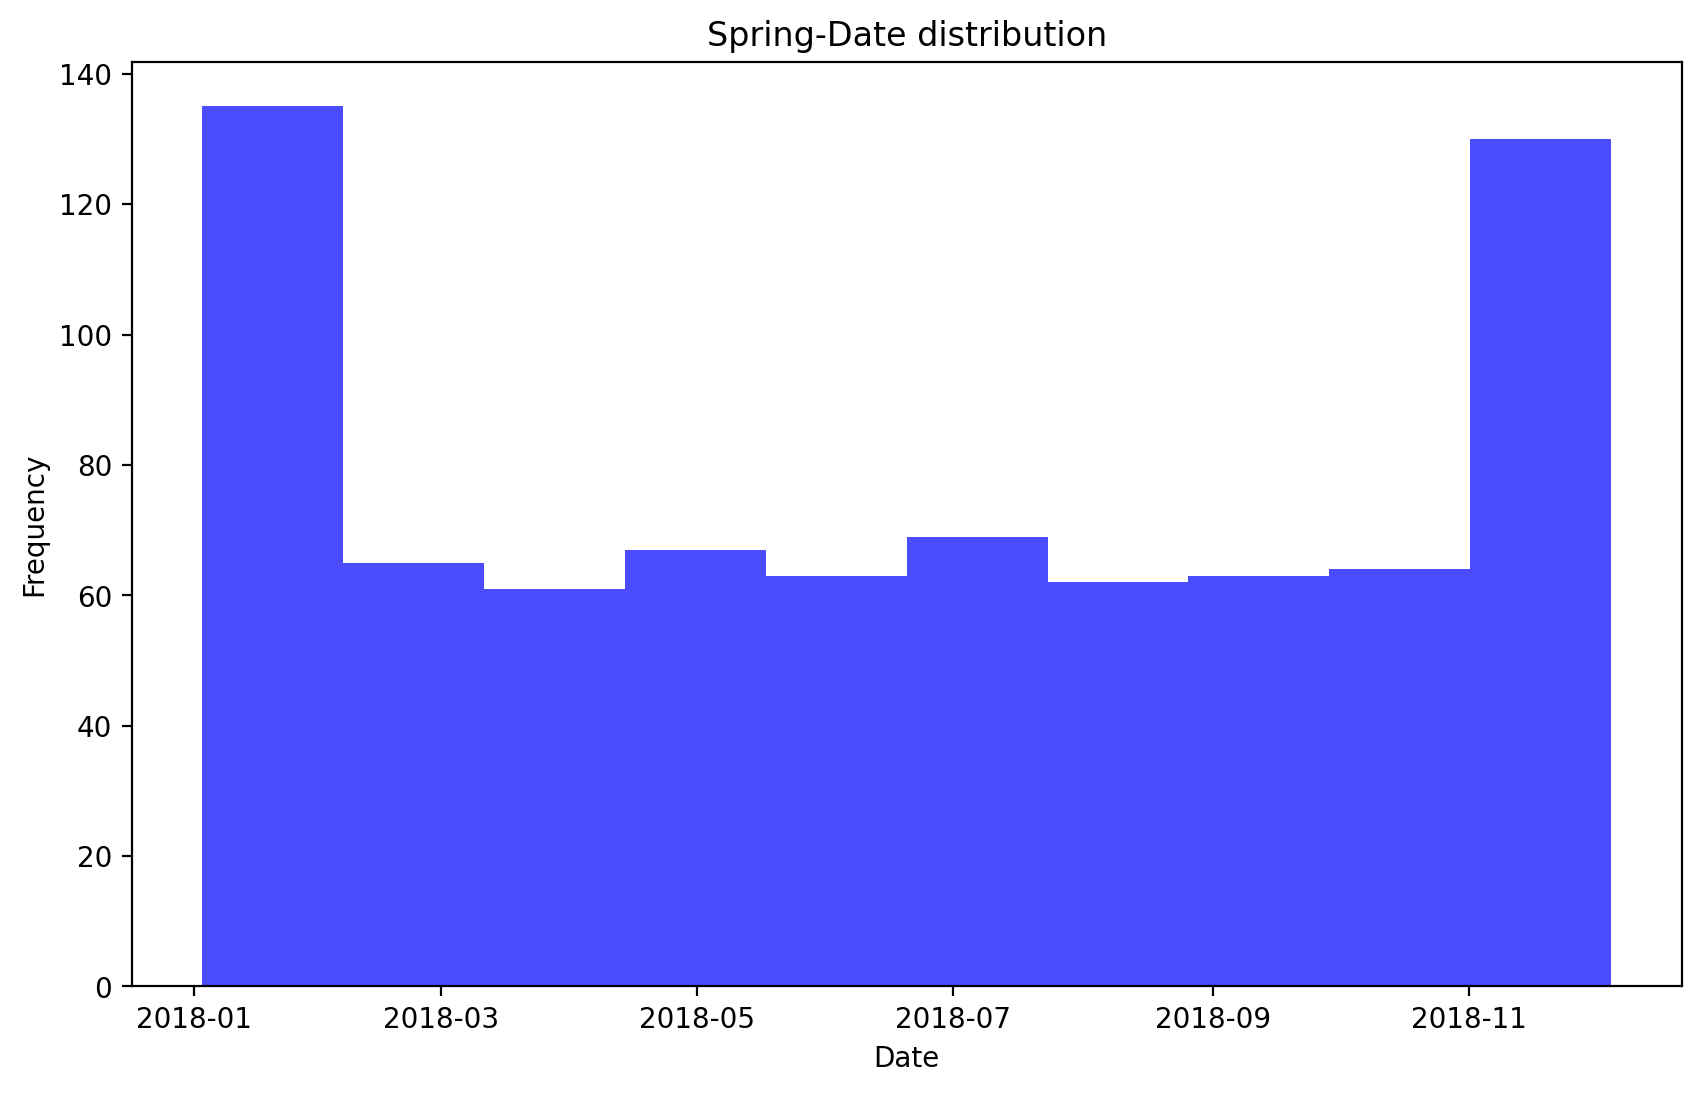

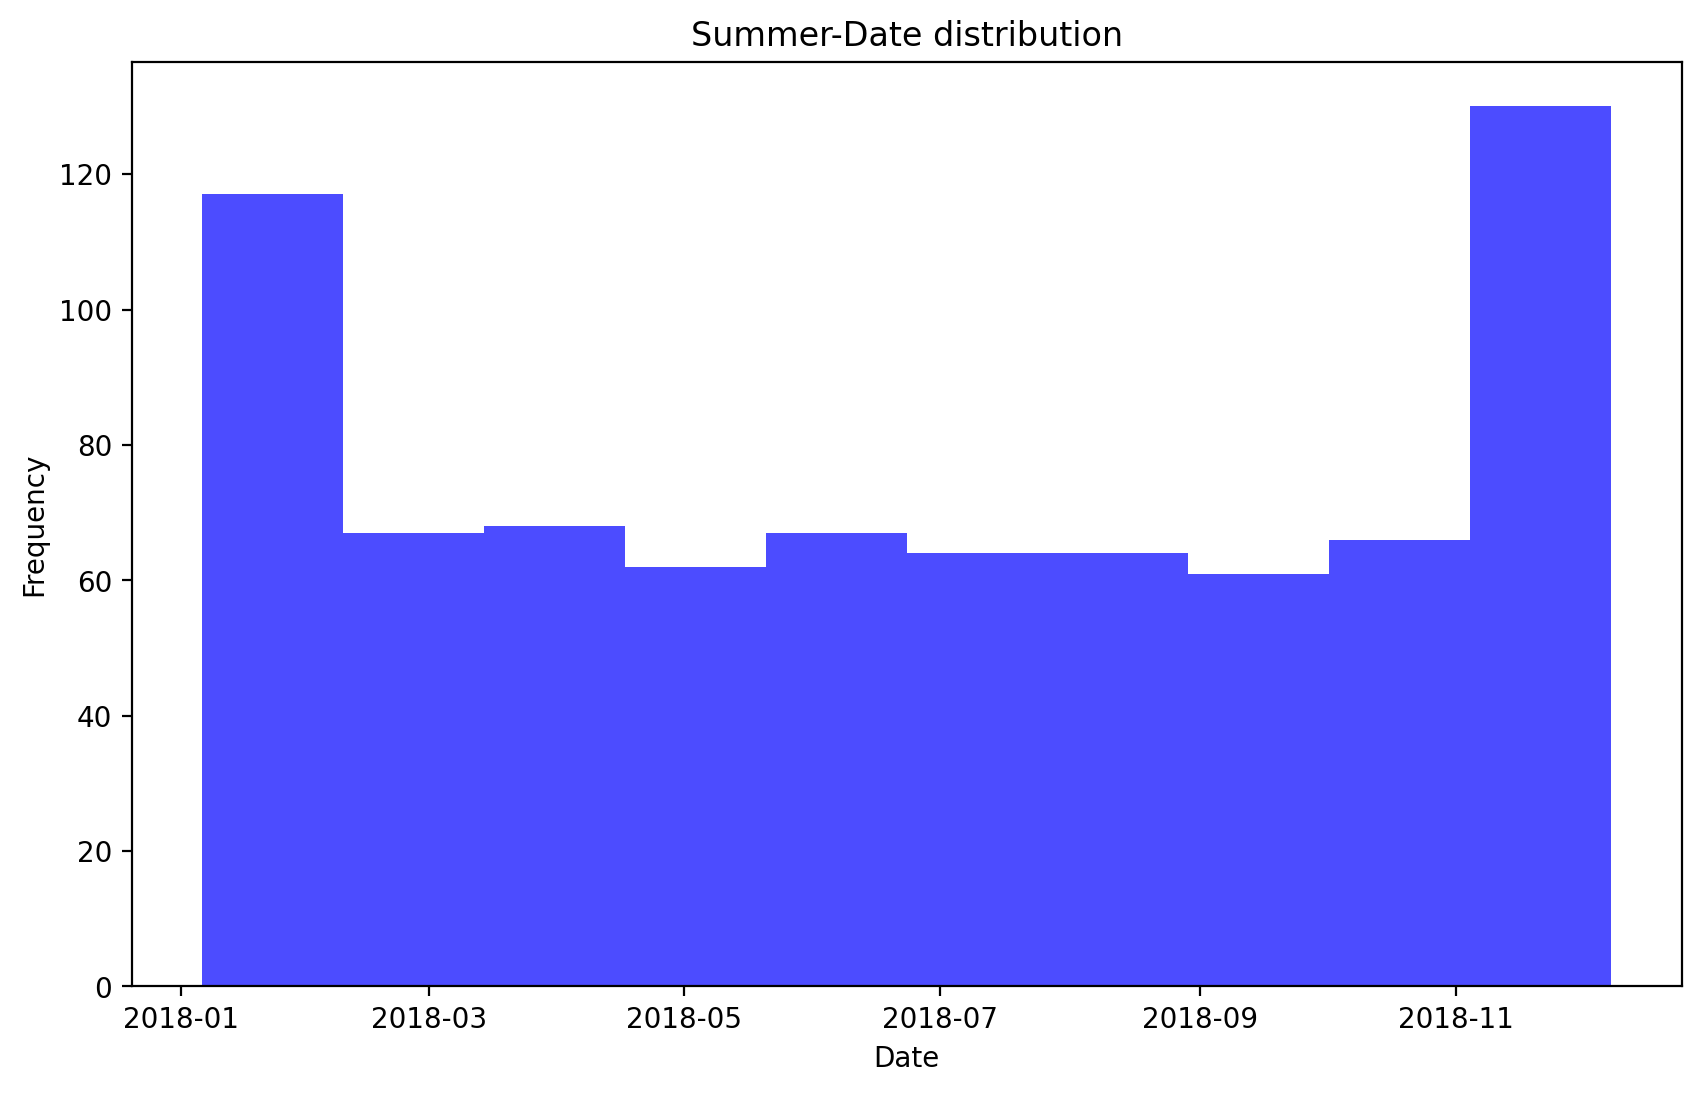

In [45]:
# NaN인 Seasons 행 제외하고, Date 열을 datetime 형식으로 변환
winter_data = df_2[df_2['Seasons'].notna() & (df_2['Seasons'] == 'Winter')]
winter_data['Date'] = pd.to_datetime(winter_data['Date'], errors='coerce').dropna()

# Winter인 경우의 Date 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(winter_data['Date'], bins=10, color='blue', alpha=0.7)
plt.title('Winter-Date distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

# NaN인 Seasons 행 제외하고, Date 열을 datetime 형식으로 변환
autumn_data = df_2[df_2['Seasons'].notna() & (df_2['Seasons'] == 'Autumn')]
autumn_data['Date'] = pd.to_datetime(autumn_data['Date'], errors='coerce').dropna()

# Autumn인 경우의 Date 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(autumn_data['Date'], bins=10, color='blue', alpha=0.7)
plt.title('Autumn-Date distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

# NaN인 Seasons 행 제외하고, Date 열을 datetime 형식으로 변환
spring_data = df_2[df_2['Seasons'].notna() & (df_2['Seasons'] == 'Spring')]
spring_data['Date'] = pd.to_datetime(spring_data['Date'], errors='coerce').dropna()

# Spring인 경우의 Date 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(spring_data['Date'], bins=10, color='blue', alpha=0.7)
plt.title('Spring-Date distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

# NaN인 Seasons 행 제외하고, Date 열을 datetime 형식으로 변환
summer_data = df_2[df_2['Seasons'].notna() & (df_2['Seasons'] == 'Summer')]
summer_data['Date'] = pd.to_datetime(summer_data['Date'], errors='coerce').dropna()

# Summer인 경우의 Date 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(summer_data['Date'], bins=10, color='blue', alpha=0.7)
plt.title('Summer-Date distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

###### 데이터를 통해 알 수 있듯이 우리가 통상적으로 아는 Season과 Date가 match되지 않는 것을 확인할 수 있음
###### 그렇기에 Temperature와 Wind Speed를 대체함에 있어서 Season은 고려사항이 아님
###### 추가적으로 Season은 결측값을 대체하지 않고 향후 분석에 있어서 제외함
###### Temperature와 Wind Speed는 다른 변수들을 고려하여 대체

In [46]:
dfdf = df.copy()
dfdf = dfdf.drop(['Seasons'], axis=1)

dfdf['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

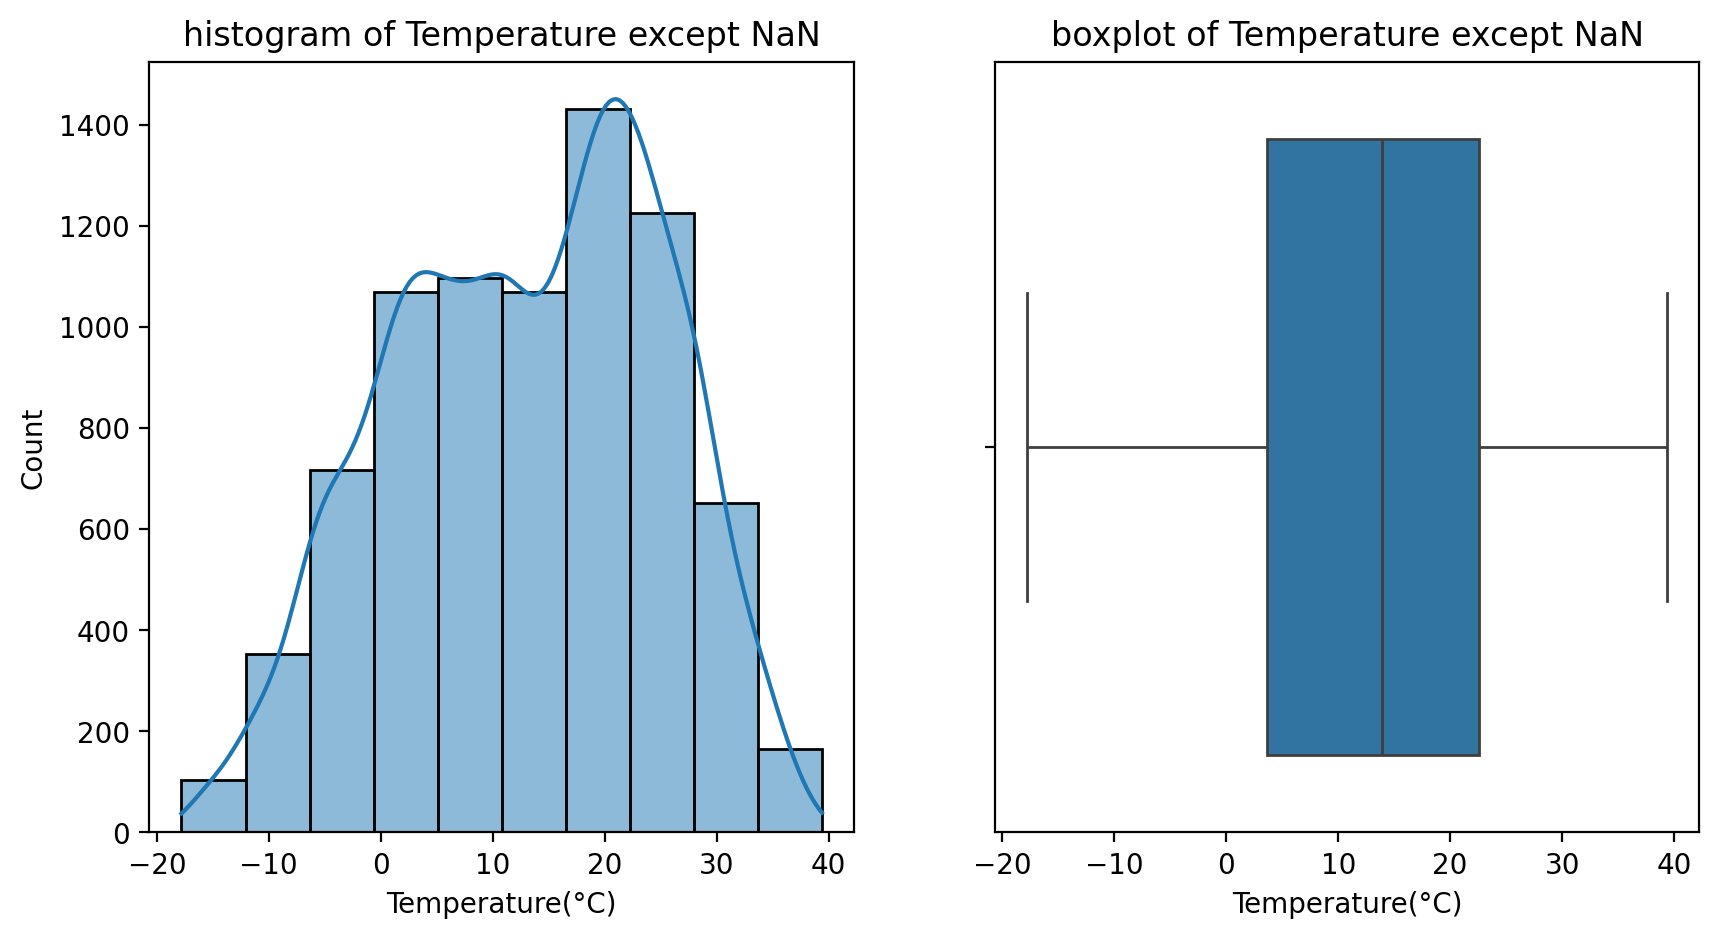

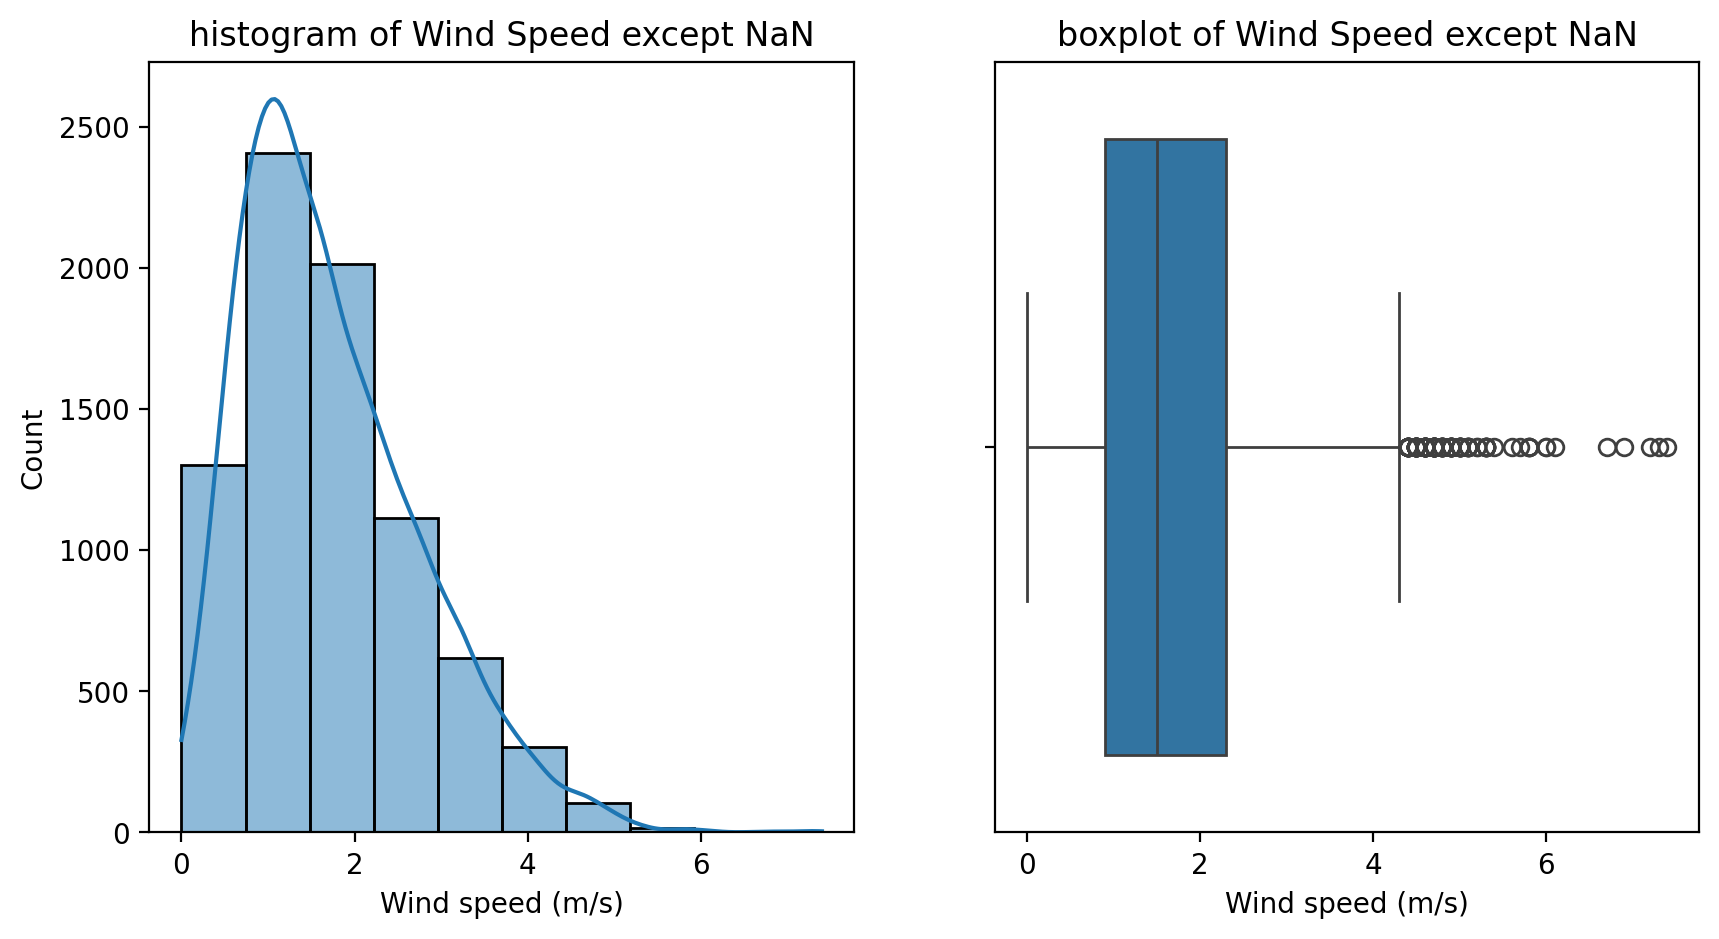

In [47]:
# 히스토그램
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(temp_T, bins=10, kde=True)
plt.title('histogram of Temperature except NaN')

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=temp_T)
plt.title('boxplot of Temperature except NaN')
plt.show()

# 히스토그램
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(temp_W, bins=10, kde=True)
plt.title('histogram of Wind Speed except NaN')

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=temp_W)
plt.title('boxplot of Wind Speed except NaN')
plt.show()

In [50]:
dfdf['Date'].dtype
print(dfdf.head())

   Unnamed: 0        Date  Rented Bike Count  Hour  Temperature(°C)  \
0           0  01/12/2017                254     0             -5.2   
1           1  01/12/2017                204     1             -5.5   
2           2  01/12/2017                173     2             -6.0   
3           3  01/12/2017                107     3             -6.2   
4           4  01/12/2017                 78     4             -6.0   

   Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0           37               2.2              2000                      -17.6   
1           38               0.8              2000                      -17.6   
2           39               1.0              2000                      -17.7   
3           40               0.9              2000                      -17.6   
4           36               NaN              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)     Holiday  \
0              

In [52]:
# 3,4,5월을 봄으로 판단(1)
# 6,7,8월을 여름으로 판단(2)
# 9,10,11월을 가을로 판단(3)
# 12,1,2월을 겨울로 판단(4)

dfdf['Date'] = pd.to_datetime(dfdf['Date'], format='%d/%m/%Y')

# New_Season 열을 생성하여 숫자값을 넣어줌
dfdf['New_Season'] = dfdf['Date'].dt.month.apply(lambda x: 4 if x in [12, 1, 2] else (1 if x in [3, 4, 5] else (2 if x in [6, 7, 8] else 3)))
dfdf.head()

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,New_Season
0,0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,4
1,1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,4
2,2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,4
3,3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,4
4,4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,4


##### 온도의 New_Season 별 경향성 파악

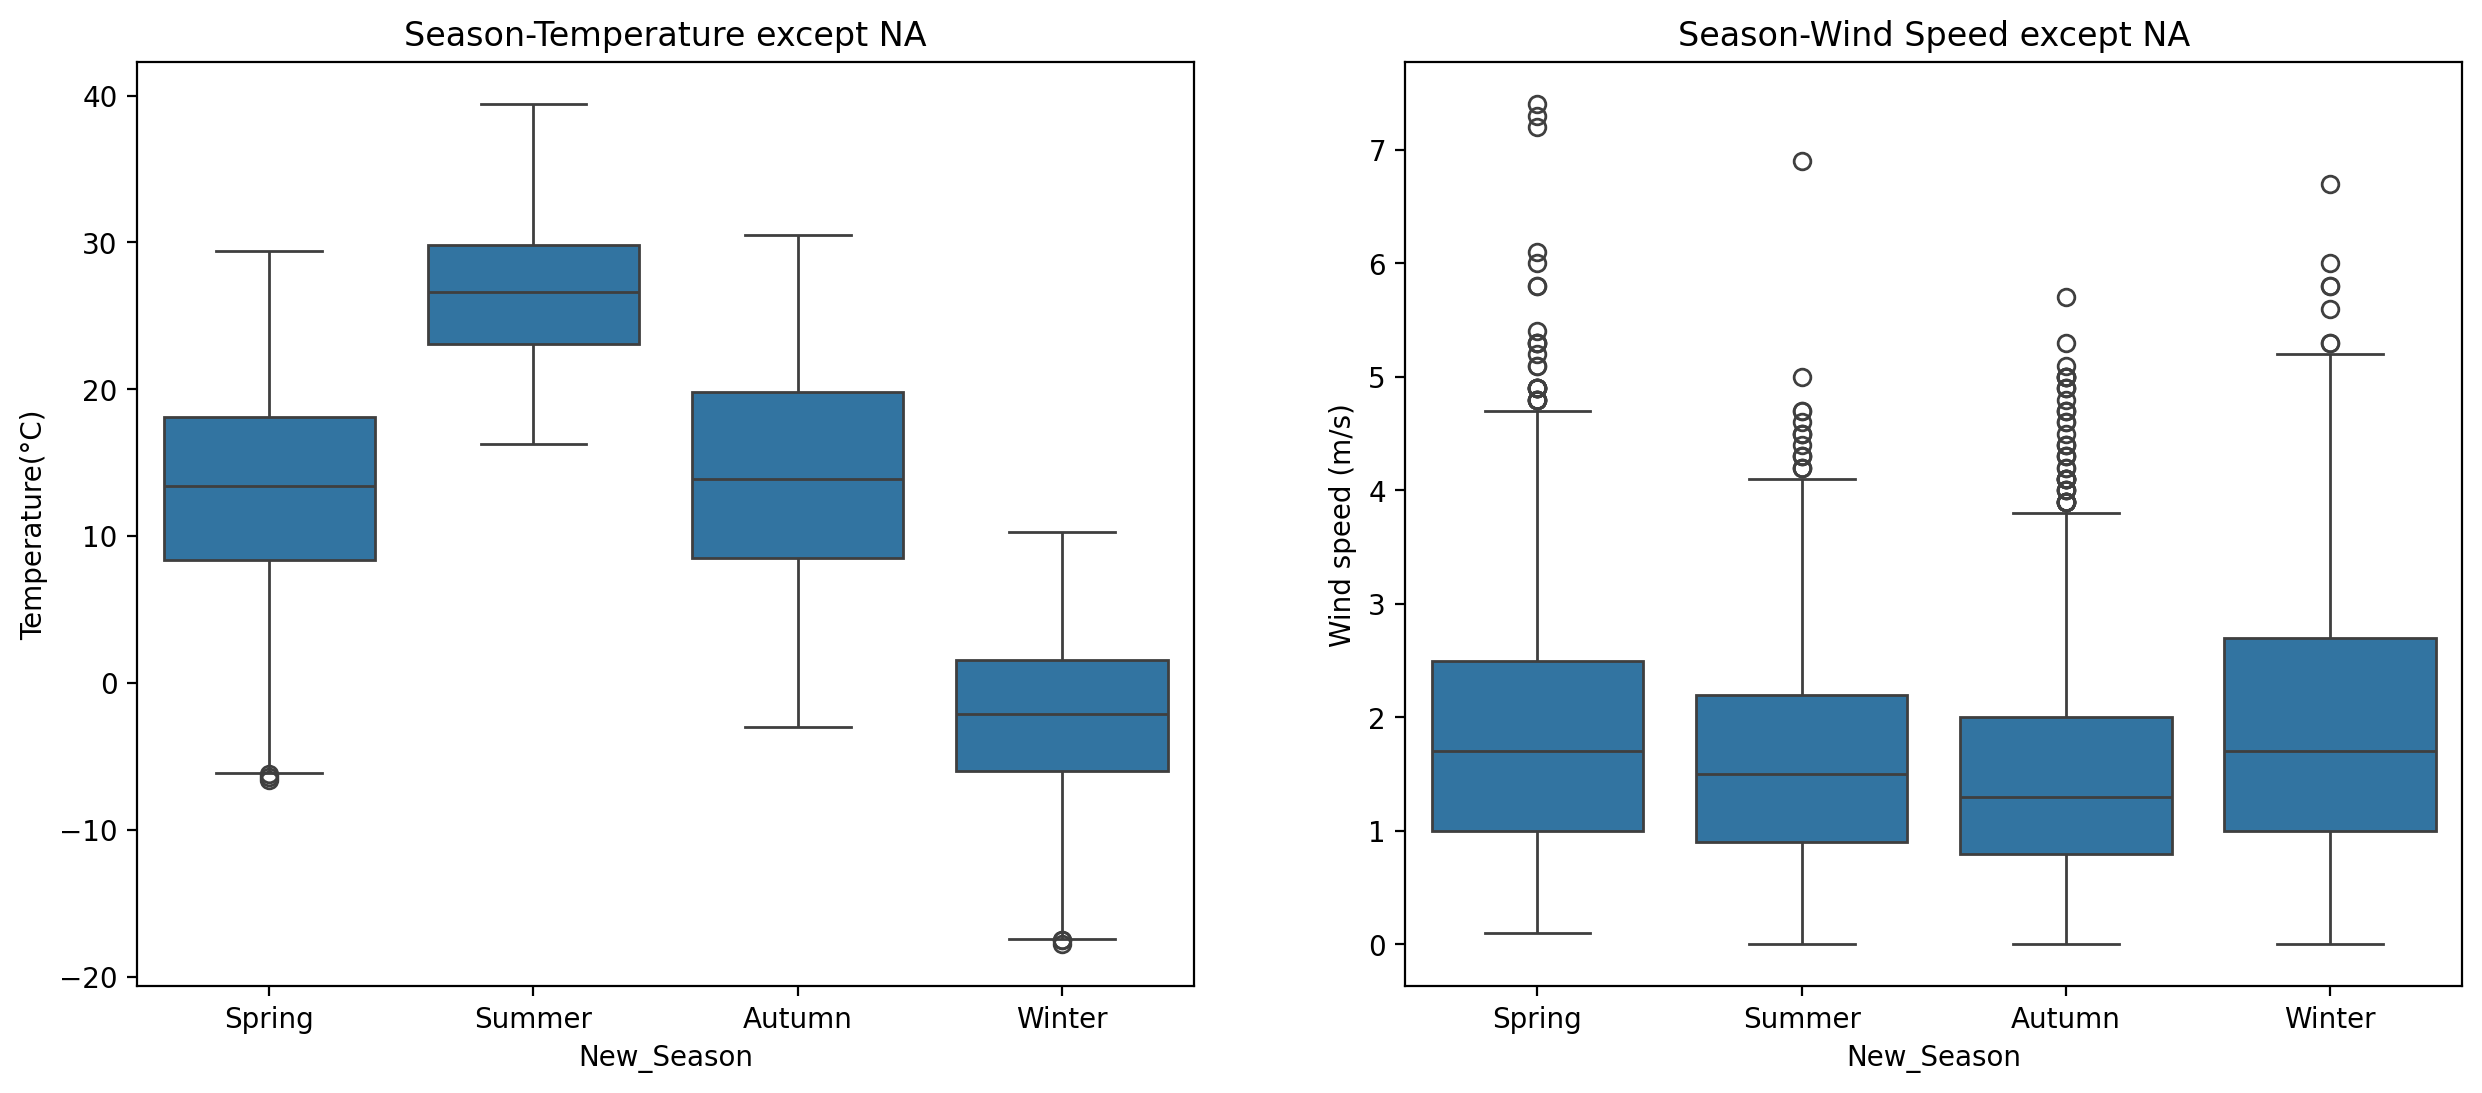

In [58]:
dfdf_clean_1  = dfdf.dropna(subset=['Temperature(°C)'])
dfdf_clean_2  = dfdf.dropna(subset=['Wind speed (m/s)'])

# boxplot for 온도, 풍속
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.boxplot(x='New_Season', y='Temperature(°C)', data=dfdf_clean_1, ax=axes[0])
axes[0].set_title('Season-Temperature except NA')
axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels(['Spring', 'Summer', 'Autumn', 'Winter'])

sns.boxplot(x='New_Season', y='Wind speed (m/s)', data=dfdf_clean_2, ax=axes[1])
axes[1].set_title('Season-Wind Speed except NA')
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()

###### 온도에 대해서는 경향성을 보이지만 풍속에 대해서는 보이지 않음 온도의 경우부터 결측을 대체하고 진행

Unnamed: 0                     0
Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)                0
Humidity(%)                    0
Wind speed (m/s)             876
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Holiday                        0
Functioning Day                0
New_Season                     0
dtype: int64


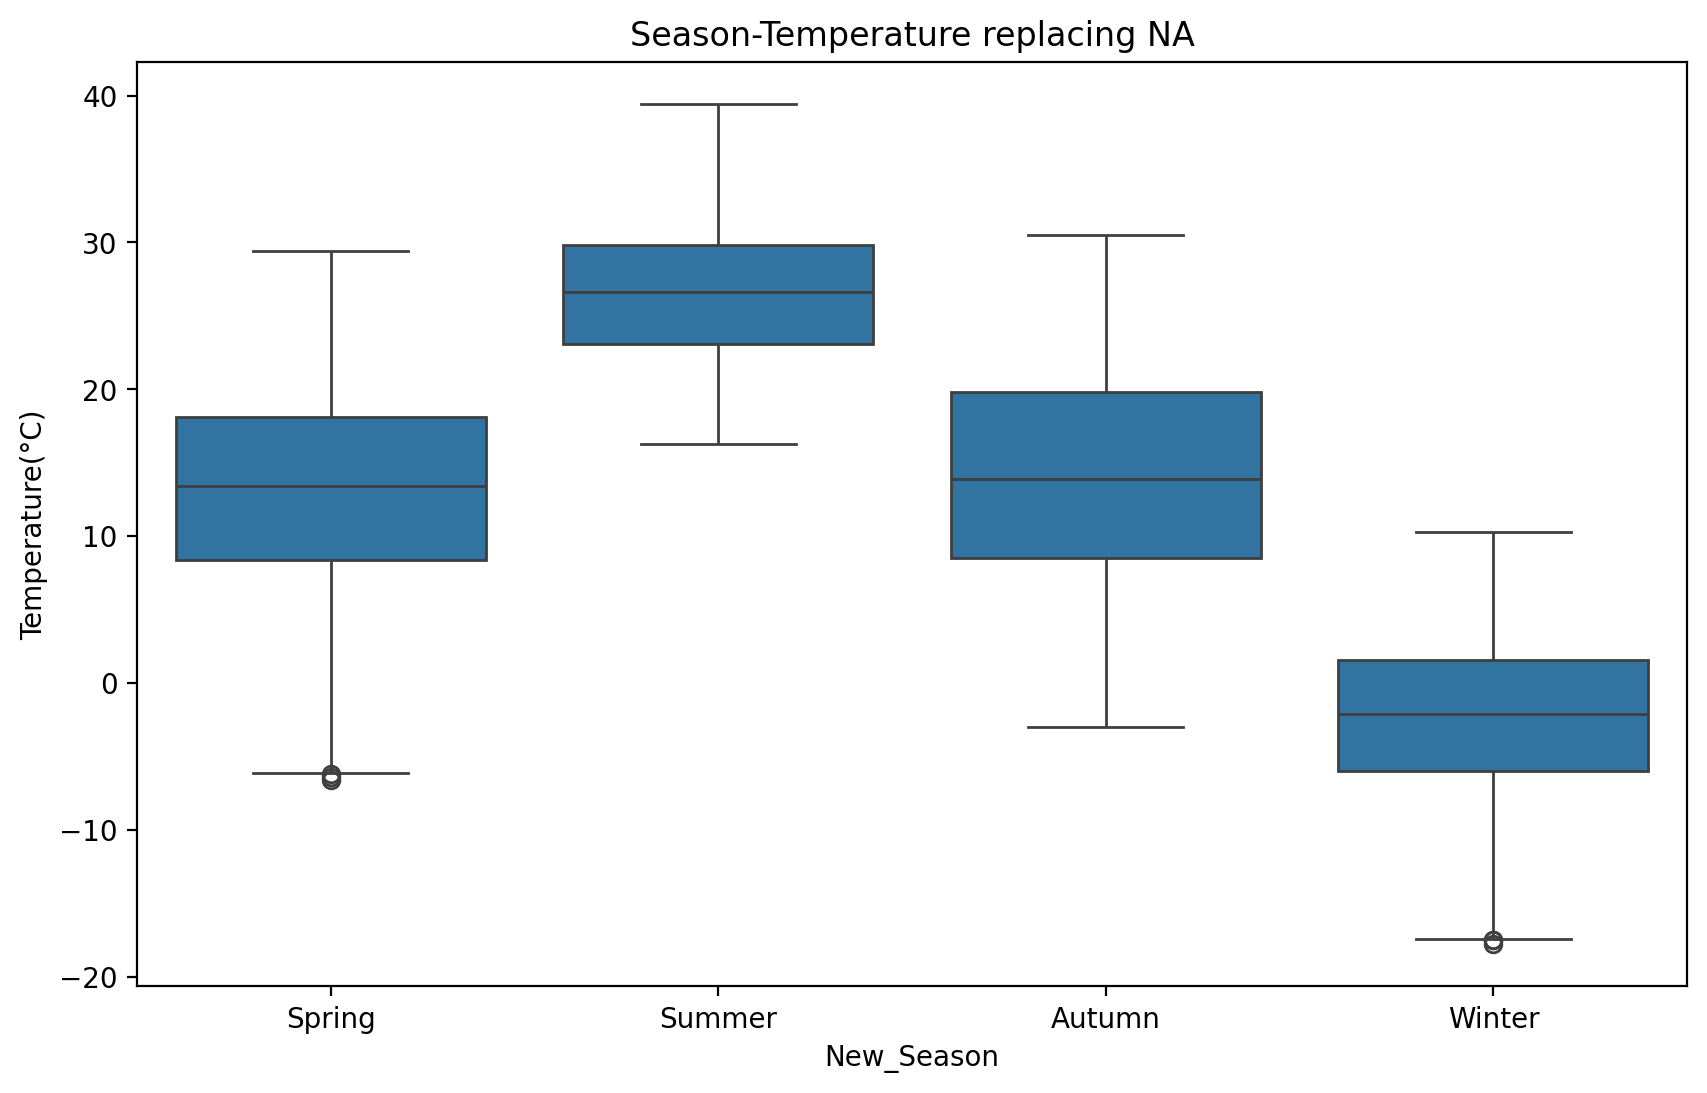

In [75]:
# 봄
df_season_1 = dfdf[dfdf['New_Season'] == 1]

mean_T_1 = df_season_1['Temperature(°C)'].mean()
sd_T_1 = df_season_1['Temperature(°C)'].std()

# 여름
df_season_2 = dfdf[dfdf['New_Season'] == 2]

mean_T_2 = df_season_1['Temperature(°C)'].mean()
sd_T_2 = df_season_1['Temperature(°C)'].std()

# 가을
df_season_3 = dfdf[dfdf['New_Season'] == 3]

mean_T_3 = df_season_1['Temperature(°C)'].mean()
sd_T_3 = df_season_1['Temperature(°C)'].std()

# 겨울
df_season_4 = dfdf[dfdf['New_Season'] == 4]

mean_T_4 = df_season_1['Temperature(°C)'].mean()
sd_T_4 = df_season_1['Temperature(°C)'].std()

# 각 New_Season 별로 온도 별 결측을 가진 행에 대해서 평균과 표준편차를 바탕으로 한 랜덤 값을 넣어줄 것임

for New_Season in range(1, 5):
    season_df = dfdf[dfdf['New_Season'] == New_Season]
    mean_temp = season_df['Temperature(°C)'].mean()
    std_temp = season_df['Temperature(°C)'].std()
    
    # 결측값을 찾아서 랜덤한 값으로 대체
    na_index = season_df[season_df['Temperature(°C)'].isna()].index
    random_values = np.random.normal(loc=mean_temp, scale=std_temp, size=len(na_index))
    dfdf.loc[na_index, 'Temperature(°C)'] = random_values

print(dfdf.isna().sum()) # 결측값이 채워진 것을 알 수 있음

plt.figure(figsize=(10, 6))
sns.boxplot(x='New_Season', y='Temperature(°C)', data=dfdf_clean_1)
plt.title('Season-Temperature replacing NA')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()

plt.show()

###### wind speed의 경우 계절마다 이상치도 있고 값이 엇비슷하다고 판단하여 주변 변수들을 고려하여 결측을 대체하기로 함


##### 풍속의 이상치는 위의 시각화를 통해 알 수 있다
###### 하지만 이상치를 제거하는 것은 기후 데이터, 특히 풍속과 관련된 데이터에서는 치명적일 수 있다 따라서 풍속에 영향을 주는 데이터를 선별하여 풍속의 결측을 대체하고자 함

                           Unnamed: 0  Rented Bike Count      Hour  \
Unnamed: 0                   1.000000           0.343272  0.001870   
Rented Bike Count            0.343272           1.000000  0.407211   
Hour                         0.001870           0.407211  1.000000   
Temperature(°C)              0.576158           0.540358  0.118823   
Humidity(%)                  0.159635          -0.201647 -0.246212   
Wind speed (m/s)            -0.159671           0.116558  0.284573   
Visibility (10m)             0.111904           0.204738  0.108185   
Dew point temperature(°C)    0.560257           0.380529  0.003029   
Solar Radiation (MJ/m2)      0.095138           0.264537  0.143733   
Rainfall(mm)                 0.038844          -0.126062  0.006357   
Snowfall (cm)               -0.150843          -0.142873 -0.026012   
New_Season                  -0.184405          -0.292008  0.003248   

                           Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
Unnamed: 0  

Text(0.5, 1.0, 'correlation heatmap of wind speed except na')

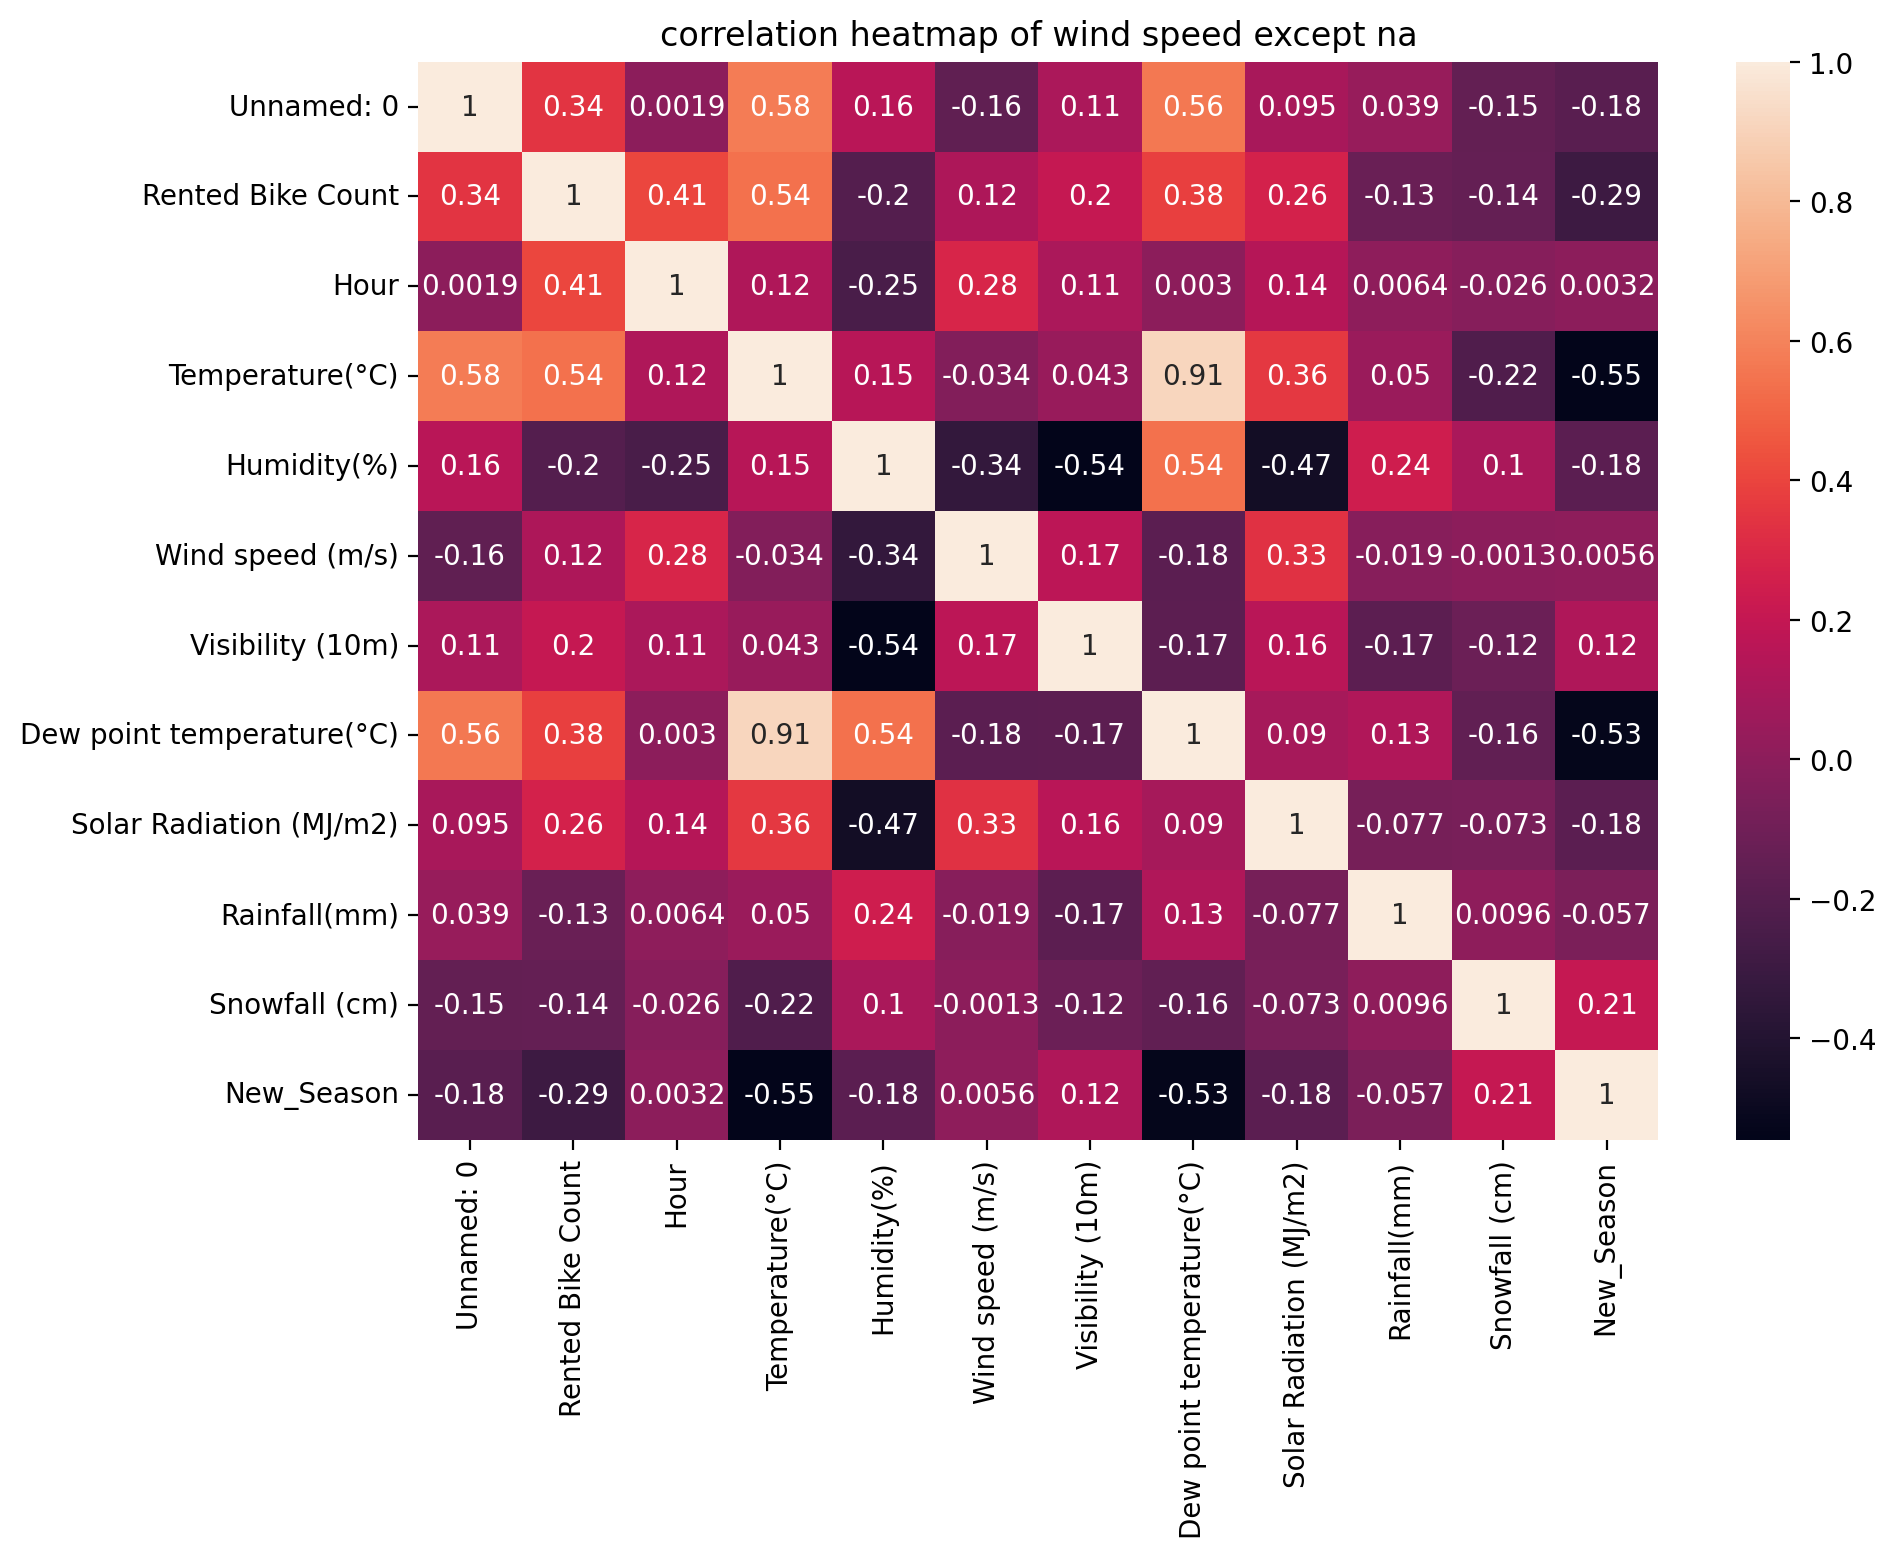

In [85]:
dfdf_clean_3 = dfdf_clean_2.drop(['Date', 'Holiday', 'Functioning Day'], axis=1)
print(dfdf_clean_3.corr())
plt.figure(figsize=(10,7))
sns.heatmap(dfdf_clean_3.corr(),annot=True)
plt.title('correlation heatmap of wind speed except na') # correlation heatmap

###### 풍속과 유의미하게 관련있는 변수가 존재하지 않아, 풍속이 이상치 이상일 때만을 골라서 다시 한 번 상관관계를 파악하고자 함

Text(0.5, 1.0, 'correlation heatmap of wind speed except na')

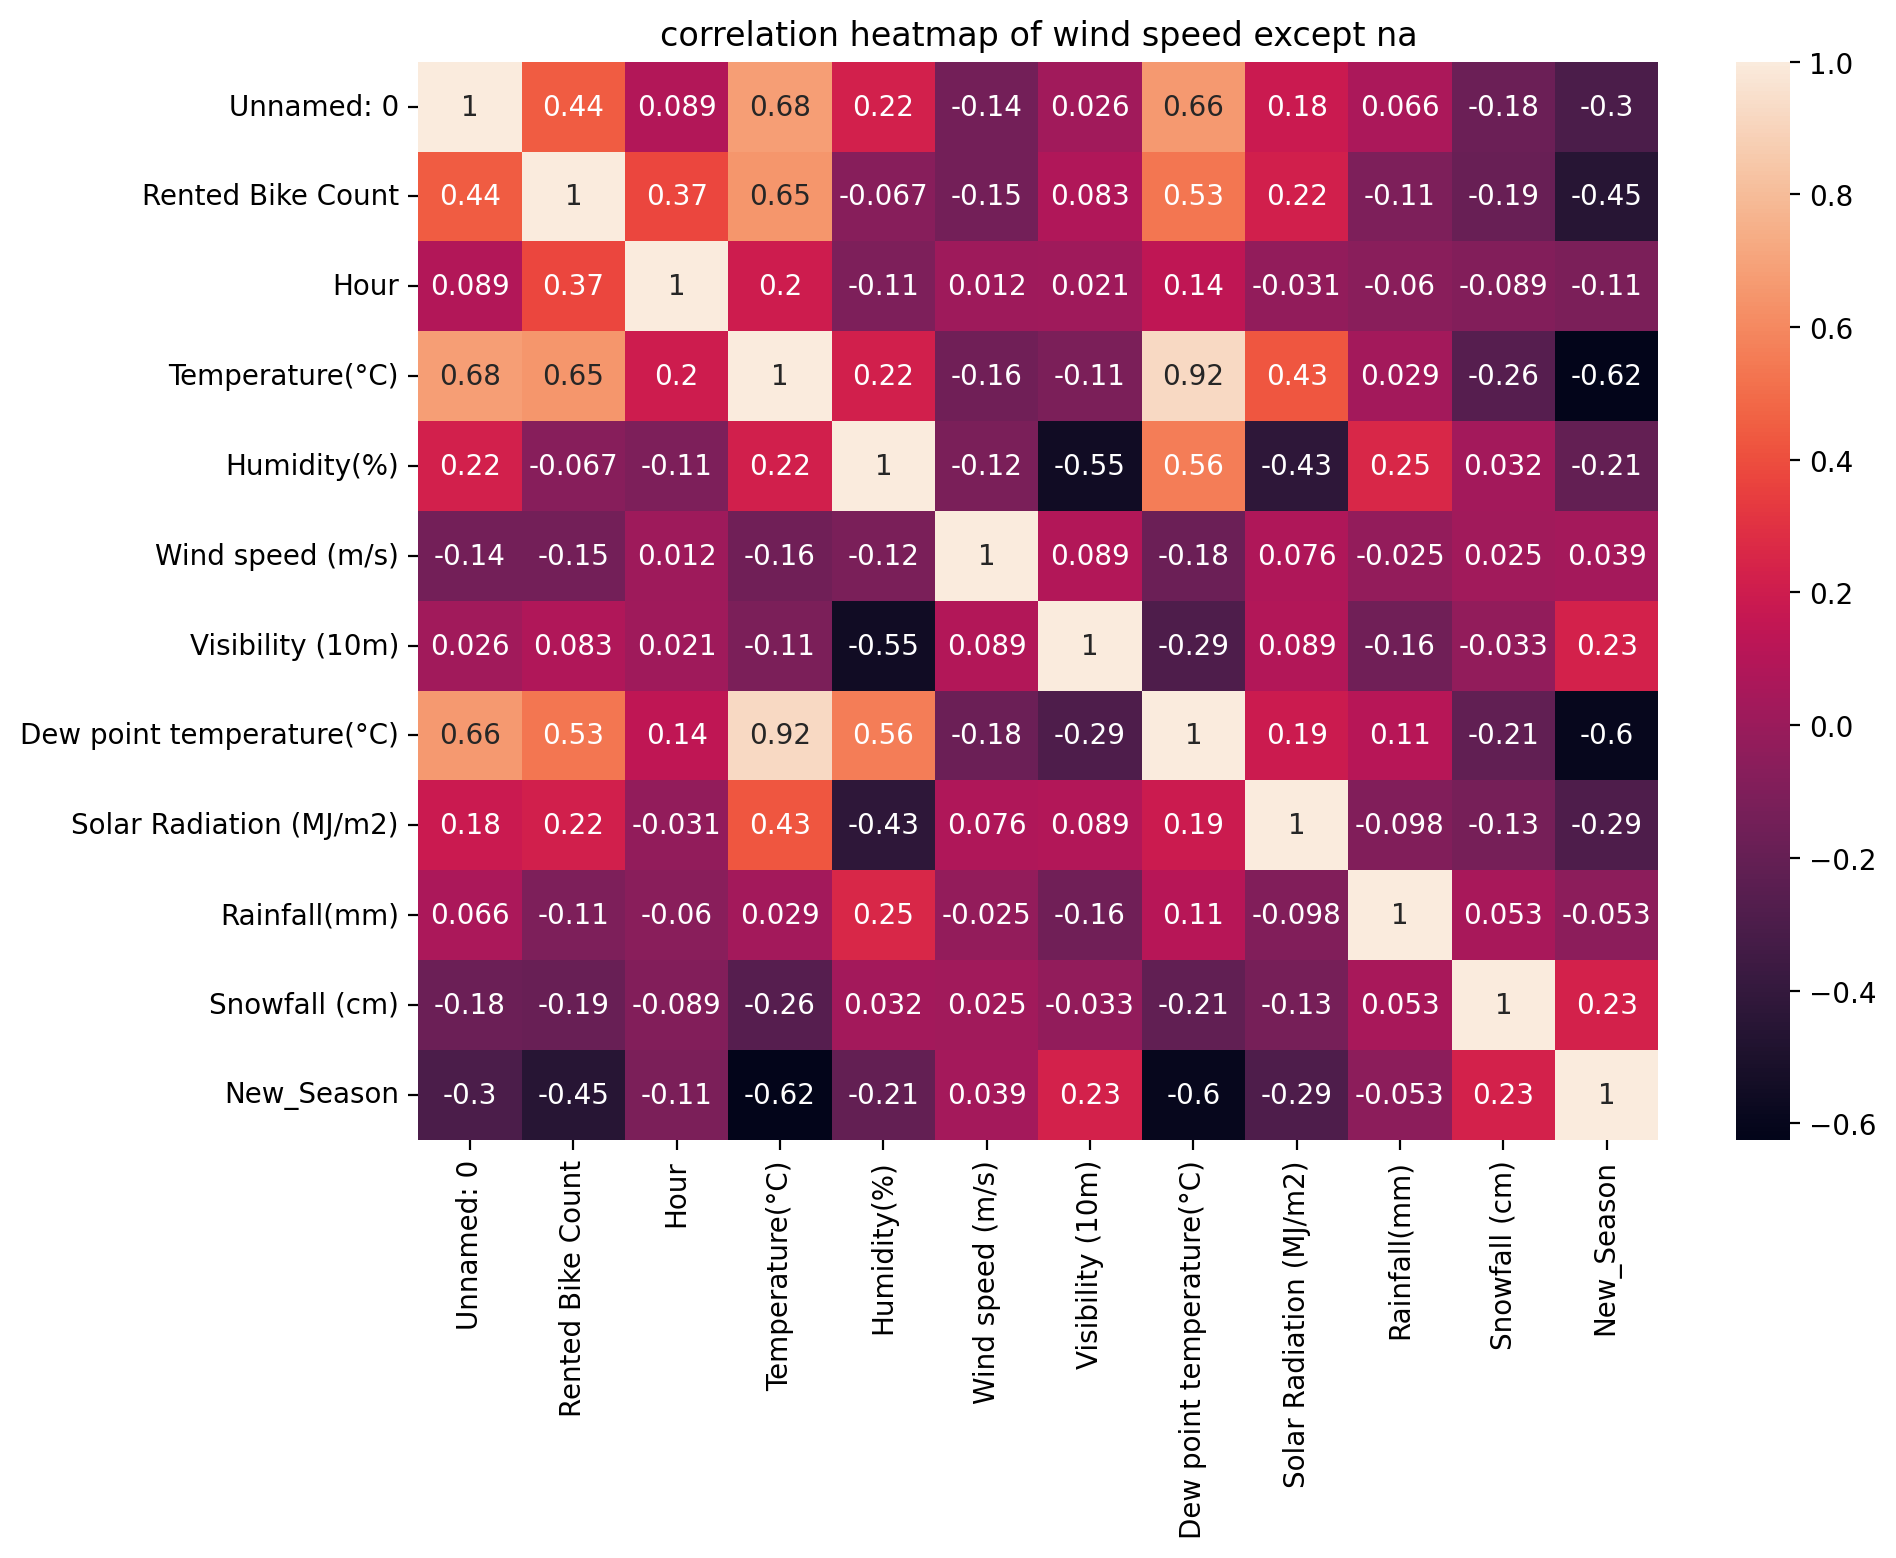

In [94]:
dfdf_clean_4 = dfdf_clean_2.drop(['Date', 'Holiday', 'Functioning Day'], axis=1)
Q3 = dfdf_clean_4.quantile(0.75)
Q3 = Q3.reset_index(drop=True)
wind_speed = Q3.loc[dfdf_clean_4.columns == 'Wind speed (m/s)'].values[0]
dfdf_clean_4 = dfdf_clean_4[dfdf_clean_4['Wind speed (m/s)'] > wind_speed]

plt.figure(figsize=(10,7))
sns.heatmap(dfdf_clean_4.corr(),annot=True)
plt.title('correlation heatmap of wind speed except na') # correlation heatmap


###### 이상치의 풍속만을 판단했음에도 별다른 유의미한 관계가 보이지 않음 
###### 그렇기에 이전 단계에서 상관관계를 고려하여 결측값을 예측하고자 함

In [103]:
from sklearn.linear_model import LinearRegression

# 제외할 변수들을 선택
# count는 극단적인 값으로 나뉨, 다른 변수들은 unknown이거나 object 변수
exclude_columns = ['Rented Bike Count', 'Date', 'Holiday', 'Functioning Day']

# Linear Regression 모델을 사용하여 값을 대체하고자 함
target_column = 'Wind speed (m/s)'
mask = dfdf[target_column].isna()

# 결측값이 없는 행에서 해당 열과 제외할 변수들을 제외한 변수들을 선택함
X = dfdf.loc[~mask].drop([target_column] + exclude_columns, axis=1)
y = dfdf.loc[~mask, target_column]

# 결측값이 있는 행에서 해당 열과 제외할 변수들을 제외한 변수들을 선택함
X_pred = dfdf.loc[mask].drop([target_column] + exclude_columns, axis=1)

# 결측값이 있는 행이 있는 경우에만 예측 수행
if not X_pred.empty:
    # 학습 수행 시작
    model = LinearRegression()
    model.fit(X, y)
    # 결측값 예측을 하고 대체함
    predicted_values = model.predict(X_pred)
    dfdf.loc[mask, target_column] = predicted_values
    
print(dfdf.isna().sum()) # 결측값이 채워진 것을 알 수 있음 

Unnamed: 0                   0
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Holiday                      0
Functioning Day              0
New_Season                   0
dtype: int64


In [105]:
dfdf.head()

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,New_Season
0,0,2017-12-01,254,0,-5.2,37,2.20000,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,4
1,1,2017-12-01,204,1,-5.5,38,0.80000,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,4
2,2,2017-12-01,173,2,-6.0,39,1.00000,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,4
3,3,2017-12-01,107,3,-6.2,40,0.90000,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,4
4,4,2017-12-01,78,4,-6.0,36,1.77214,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,4
